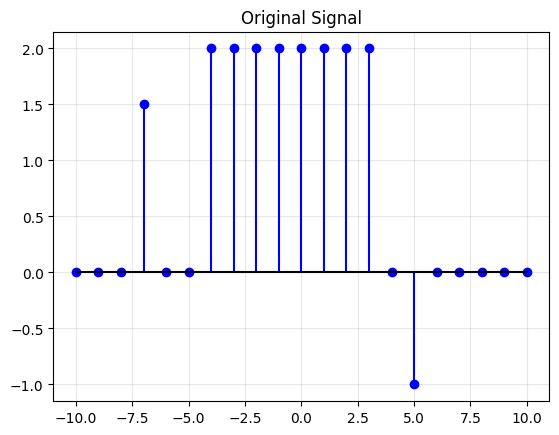

In [13]:
import numpy as np
import matplotlib.pyplot as plt

n = np.arange(-10,11)
x = np.zeros(n.size)
x[(n>=-4) & (n<=3)] = 2
x[n==5] = -1
x[n==-7] = 1.5

plt.stem(n,x,'b', basefmt='k')
plt.title('Original Signal')
plt.grid(True, alpha=0.3)
plt.show()


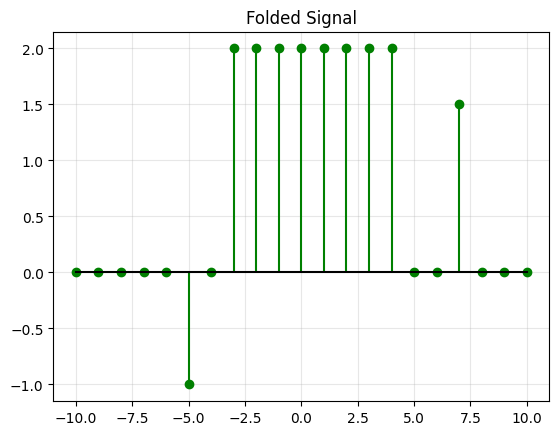

In [14]:
import numpy as np
import matplotlib.pyplot as plt

n = np.arange(-10,11)
x = np.zeros(n.size)
x[(n>=-4) & (n<=3)] = 2
x[n==5] = -1
x[n==-7] = 1.5

plt.stem(n, x[::-1], 'g', basefmt='k')
plt.title('Folded Signal')
plt.grid(True, alpha=0.3)
plt.show()


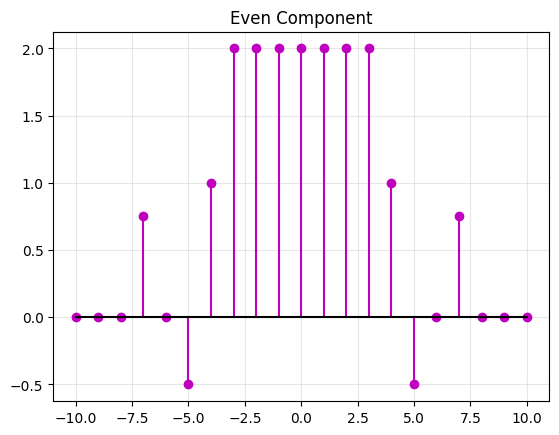

In [15]:
import numpy as np
import matplotlib.pyplot as plt

n = np.arange(-10,11)
x = np.zeros(n.size)
x[(n>=-4) & (n<=3)] = 2
x[n==5] = -1
x[n==-7] = 1.5

xf = x[::-1]
xe = (x + xf) / 2

plt.stem(n, xe, 'm', basefmt='k')
plt.title('Even Component')
plt.grid(True, alpha=0.3)
plt.show()


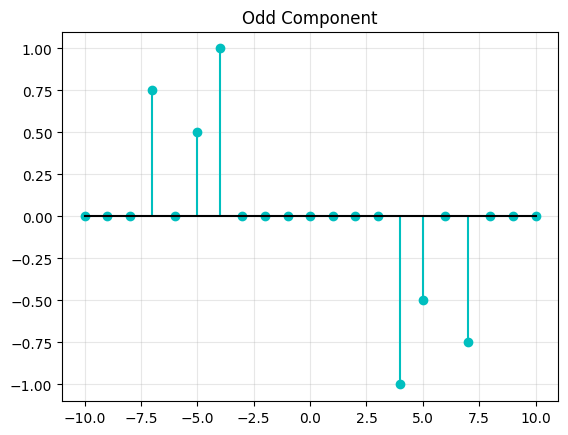

In [16]:
import numpy as np
import matplotlib.pyplot as plt

n = np.arange(-10,11)
x = np.zeros(n.size)
x[(n>=-4) & (n<=3)] = 2
x[n==5] = -1
x[n==-7] = 1.5

xf = x[::-1]
xo = (x - xf) / 2

plt.stem(n, xo, 'c', basefmt='k')
plt.title('Odd Component')
plt.grid(True, alpha=0.3)
plt.show()
